In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Import the data and explore

In [2]:
df=pd.read_csv('employee_retention_data.csv',parse_dates=['join_date','quit_date'])
df['dept']=df['dept'].astype('category')
df['company_id']=df['company_id'].astype('category')
df['employee_id']=df['employee_id'].astype('int')

In [3]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315,4,marketing,14,101000.0,2014-10-13,NaT
3,662910,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null int64
company_id     24702 non-null category
dept           24702 non-null category
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
dtypes: category(2), datetime64[ns](2), float64(1), int64(2)
memory usage: 1013.9 KB


#### It looks like that the null values in the quit_date column are for employees that have not quited. Using that we could make another data frame only with employees who have quited.

In [5]:
mask=df['quit_date'].notnull()
df_quit=df[mask].copy()

In [6]:
df_quit.sort_values(by=['join_date','company_id','dept','seniority','salary'],inplace=True)
df_quit.reset_index(inplace=True,drop=True)

In [7]:
df_quit.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,733094,1,customer_service,1,30000.0,2011-01-24,2011-12-30
1,554358,1,customer_service,8,67000.0,2011-01-24,2013-03-01
2,418614,1,customer_service,9,77000.0,2011-01-24,2012-11-09
3,224294,1,customer_service,14,92000.0,2011-01-24,2013-03-22
4,224745,1,customer_service,19,108000.0,2011-01-24,2012-02-24


#### Q1:
Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id.

In [9]:
df_join_date=pd.DataFrame(df_quit.groupby(['company_id','join_date']).count()['employee_id'])
df_join_date.reset_index(inplace=True)
df_join_date.rename({'employee_id':'count'},inplace=True,axis=1)
df_join_date['count']=df_join_date['count'].fillna(0)

In [10]:
df_join_date.head()

,company_id,join_date,count
0,1,2011-01-24,25.0
1,1,2011-01-25,2.0
2,1,2011-01-26,2.0
3,1,2011-01-31,28.0
4,1,2011-02-01,7.0


In [11]:
df_quit_date=pd.DataFrame(df_quit.groupby(['company_id','quit_date']).count()['employee_id'])
df_quit_date.reset_index(inplace=True)
df_quit_date.rename({'employee_id':'quit_count'},inplace=True,axis=1)
df_quit_date['quit_count']=df_quit_date['quit_count'].fillna(0)

In [12]:
df_quit_date.head()

,company_id,quit_date,quit_count
0,1,2011-10-13,0.0
1,1,2011-10-14,0.0
2,1,2011-10-21,1.0
3,1,2011-10-28,0.0
4,1,2011-11-11,1.0


In [13]:
df_join_date['cumsum_join']=df_join_date.groupby('company_id')['count'].cumsum()

In [14]:
df_quit_date[df_quit_date['company_id']==3].head()

,company_id,quit_date,quit_count
1328,3,2011-10-13,0.0
1329,3,2011-10-14,0.0
1330,3,2011-10-21,0.0
1331,3,2011-10-28,0.0
1332,3,2011-11-11,0.0


In [15]:
df_join_date.drop('count',inplace=True,axis=1)
df_join_date[df_join_date['company_id']==3].head()

,company_id,join_date,cumsum_join
1544,3,2011-01-24,9.0
1545,3,2011-01-25,10.0
1546,3,2011-01-26,12.0
1547,3,2011-01-31,19.0
1548,3,2011-02-01,20.0


In [16]:
df_merged=df_join_date.merge(df_quit_date,how='outer',left_on=['company_id',
                                                               'join_date'],right_on=['company_id','quit_date'])

In [17]:
df_merged['join_date']=df_merged['join_date'].fillna(df_merged['quit_date'])

In [18]:
df_merged.tail()

,company_id,join_date,cumsum_join,quit_date,quit_count
13483,12,2015-12-01,NaN,2015-12-01,0.0
13484,12,2015-12-03,NaN,2015-12-03,0.0
13485,12,2015-12-04,NaN,2015-12-04,0.0
13486,12,2015-12-08,NaN,2015-12-08,0.0
13487,12,2015-12-09,NaN,2015-12-09,0.0


In [19]:
df_merged.rename({'join_date':'date'},inplace=True,axis=1)

In [20]:
df_merged.drop('quit_date',inplace=True,axis=1)

In [21]:
df_merged['quit_count']=df_merged['quit_count'].fillna(0)

In [22]:
df_merged[df_merged['date']>'2012-01-01'].head()

,company_id,date,cumsum_join,quit_count
190,1,2012-01-03,1568.0,1.0
191,1,2012-01-04,1569.0,0.0
192,1,2012-01-05,1570.0,1.0
193,1,2012-01-09,1590.0,1.0
194,1,2012-01-10,1591.0,0.0


In [23]:
df_merged['headcount']=df_merged['cumsum_join']-df_merged['quit_count']

In [24]:
df_merged[df_merged['date']>'2012-01-01'].head()

,company_id,date,cumsum_join,quit_count,headcount
190,1,2012-01-03,1568.0,1.0,1567.0
191,1,2012-01-04,1569.0,0.0,1569.0
192,1,2012-01-05,1570.0,1.0,1569.0
193,1,2012-01-09,1590.0,1.0,1589.0
194,1,2012-01-10,1591.0,0.0,1591.0


In [25]:
df_merged.drop(['cumsum_join','quit_count'],inplace=True,axis=1)

In [26]:
df_merged.head()

,company_id,date,headcount
0,1,2011-01-24,25.0
1,1,2011-01-25,27.0
2,1,2011-01-26,29.0
3,1,2011-01-31,57.0
4,1,2011-02-01,64.0


In [27]:
df_merged=df_merged[['date','company_id', 'headcount']]

In [28]:
df_merged.head()

,date,company_id,headcount
0,2011-01-24,1,25.0
1,2011-01-25,1,27.0
2,2011-01-26,1,29.0
3,2011-01-31,1,57.0
4,2011-02-01,1,64.0


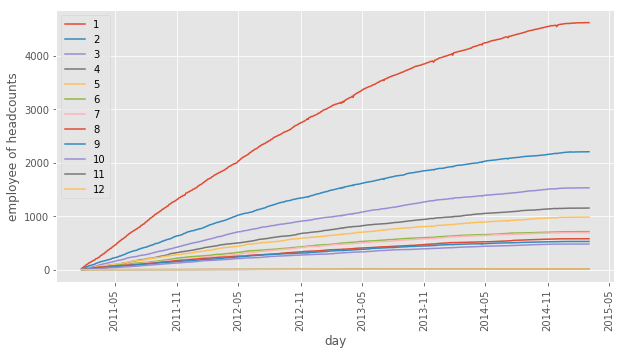

In [38]:
plt.figure(figsize=(10,5))
for i in sorted(df_merged['company_id'].unique()):
    plt.plot(df_merged[df_merged['company_id']==i]['date'],
             df_merged[df_merged['company_id']==i]['headcount'],label=i)
plt.xticks(rotation='vertical')
plt.ylabel('employee of headcounts')
plt.xlabel('day')
plt.legend()

#### Q2
What are the main factors that drive employee churn? Do they make sense? Explain your
findings.

"Employee churn is the overall turnover in an organization's staff as existing employees leave and new ones are hired. The churn rate is usually calculated as the percentage of employees leaving the company over some specified time period. Although some staff turnover is inevitable, a high rate of churn is costly."

In [40]:
df_quit.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,733094,1,customer_service,1,30000.0,2011-01-24,2011-12-30
1,554358,1,customer_service,8,67000.0,2011-01-24,2013-03-01
2,418614,1,customer_service,9,77000.0,2011-01-24,2012-11-09
3,224294,1,customer_service,14,92000.0,2011-01-24,2013-03-22
4,224745,1,customer_service,19,108000.0,2011-01-24,2012-02-24


#### Let's add a column to the df_quit that indicates number of days they have worked.

In [60]:

df_quit['days']=df_quit['quit_date']-df_quit['join_date']
df_quit['days']=df_quit['days'].astype('timedelta64[D]')


In [61]:
df_quit.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,days
0,733094,1,customer_service,1,30000.0,2011-01-24,2011-12-30,340.0
1,554358,1,customer_service,8,67000.0,2011-01-24,2013-03-01,767.0
2,418614,1,customer_service,9,77000.0,2011-01-24,2012-11-09,655.0
3,224294,1,customer_service,14,92000.0,2011-01-24,2013-03-22,788.0
4,224745,1,customer_service,19,108000.0,2011-01-24,2012-02-24,396.0


''

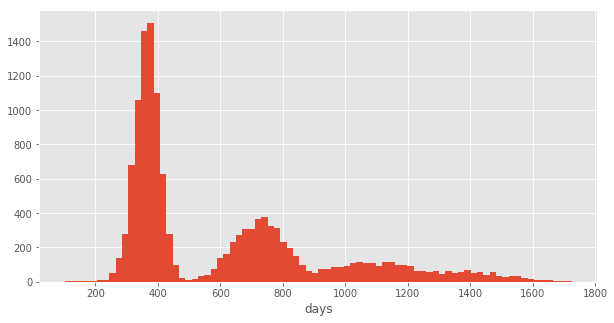

In [78]:
plt.figure(figsize=(10,5))
plt.hist(df_quit['days'],bins=80)
plt.xlabel('days')
;

#### It is clearly a multi modal distribution. Most people leave the first year. Plotting the distribution data for different  department or company  might help to understand what is going on.

''

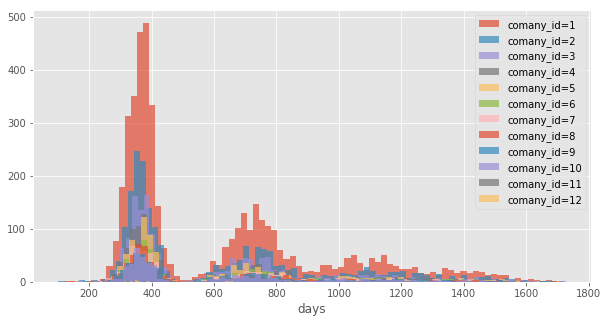

In [95]:
plt.figure(figsize=(10,5))
for i in df_quit['company_id'].unique():
    mask=(df_quit['company_id']==i)

    plt.hist(df_quit[mask]['days'],bins=80,alpha=.7,label='comany_id={}'.format(i))
plt.xlabel('days')
plt.legend()
;


The same pattern is present for all companies.

''

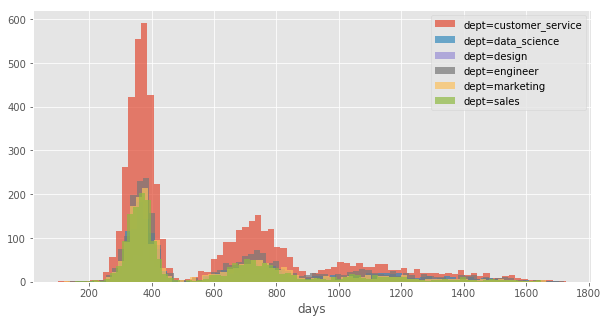

In [96]:
plt.figure(figsize=(10,5))
for i in df_quit['dept'].unique():
    mask=(df_quit['dept']==i)

    plt.hist(df_quit[mask]['days'],bins=80,alpha=.7,label='dept={}'.format(i))
plt.xlabel('days')
plt.legend()
;

Also the same pattern for different departments.It looks like that the number of people leave peaks after the